In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import seaborn as sns

## 1. 날씨 데이터 불러오기

In [80]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/total.csv", encoding='cp949', index_col='일시')
df

,지점,지점명,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),기사,안개 계속시간(hr)
일시,,,,,,,,,,,,,,,,,,,,,
1973.1.1,108,서울,3.2,-1.2,2303.0,7.0,1418.0,3.95,NaN,NaN,...,3.0,5.8,8.2,13.8,15.5,NaN,1.7,0.0,{비}0052-0215. {싸락눈}0328-0436. {싸락눈}0450-0540...,NaN
1973.1.2,108,서울,-6.8,-11.0,2400.0,-1.1,0.0,NaN,NaN,NaN,...,3.0,5.8,8.1,13.7,15.5,NaN,1.7,0.0,NaN,NaN
1973.1.3,108,서울,-7.5,-11.3,319.0,-2.8,1358.0,4.12,NaN,NaN,...,2.8,5.7,8.0,13.7,15.4,NaN,1.3,0.0,{눈}0845-{눈}{강도0}0900-{눈}{강도0}1200-1252.,NaN
1973.1.4,108,서울,-2.7,-6.9,602.0,3.0,1438.0,NaN,NaN,NaN,...,2.5,5.5,7.8,13.5,15.3,NaN,1.0,NaN,{박무}0624-{박무}{강도1}0900-{박무}1141. {박무}1840-{박무...,NaN
1973.1.5,108,서울,0.1,-3.7,659.0,5.6,1335.0,NaN,NaN,NaN,...,2.5,5.5,7.8,13.4,15.3,NaN,0.6,NaN,-{박무}-{박무}{강도0}0300-{박무}{강도1}0600-{박무}{강도2}090...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022.12.27,108,서울,-2.6,-7.3,720.0,3.3,1515.0,NaN,NaN,NaN,...,3.1,7.0,10.8,16.4,18.1,1.1,1.6,0.1,NaN,NaN
2022.12.28,108,서울,-3.3,-6.0,2355.0,0.1,1453.0,3.00,NaN,NaN,...,3.0,6.8,10.7,16.3,18.1,1.2,1.8,NaN,{눈}0245-{눈}{강도0}0300-0545.,NaN
2022.12.29,108,서울,-2.9,-7.8,728.0,2.1,1522.0,4.33,NaN,NaN,...,2.9,6.7,10.5,16.2,18.1,1.2,1.7,0.0,{눈}1940-{눈}{강도0}2100-{눈}{강도0}2400-,NaN


## 2. 각 Column Nan 값들 비율 확인하기

In [81]:
null_percentage = df.apply(pd.isnull).sum() / df.shape[0]
null_percentage

지점               0.000000
지점명              0.000000
평균기온(°C)         0.000000
최저기온(°C)         0.000110
최저기온 시각(hhmi)    0.000110
                   ...   
합계 대형증발량(mm)     0.406363
합계 소형증발량(mm)     0.080714
9-9강수(mm)        0.617019
기사               0.213449
안개 계속시간(hr)      0.961943
Length: 61, dtype: float64

In [82]:
df.drop(['지점', '지점명', '최저기온 시각(hhmi)', '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)', '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)', '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속 풍향(16방위)', '최대 풍속 시각(hhmi)', '최다풍향(16방위)', '최소 상대습도 시각(hhmi)', '최고 해면기압 시각(hhmi)', '최저 해면기압 시각(hhmi)', '1시간 최다일사 시각(hhmi)', '1시간 최다일사량(MJ/m2)', '일 최심신적설 시각(hhmi)', '일 최심적설 시각(hhmi)', '합계 3시간 신적설(cm)', '평균 중하층운량(1/10)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0m 지중온도(°C)', '1.5m 지중온도(°C)', '3.0m 지중온도(°C)', '5.0m 지중온도(°C)', '합계 대형증발량(mm)', '합계 소형증발량(mm)', '9-9강수(mm)', '기사', '안개 계속시간(hr)'], axis=1, inplace=True);

In [83]:
df['최저기온(°C)'] = df['최저기온(°C)'].ffill()
df['최고기온(°C)'] = df['최고기온(°C)'].ffill()
df['일강수량(mm)'] = df['일강수량(mm)'].fillna(0)
df['최대 순간 풍속(m/s)'] = df['최대 순간 풍속(m/s)'].ffill()
df['최대 풍속(m/s)'] = df['최대 풍속(m/s)'].ffill()
df['평균 풍속(m/s)'] = df['평균 풍속(m/s)'].ffill()
df['풍정합(100m)'] = df['풍정합(100m)'].ffill()
df['최소 상대습도(%)'] = df['최소 상대습도(%)'].ffill()
df['평균 해면기압(hPa)'] = df['평균 해면기압(hPa)'].ffill()
df['평균 현지기압(hPa)'] = df['평균 현지기압(hPa)'].ffill()
df['최고 해면기압(hPa)'] = df['최고 해면기압(hPa)'].ffill()
df['최저 해면기압(hPa)'] = df['최저 해면기압(hPa)'].ffill()
df['합계 일조시간(hr)'] = df['합계 일조시간(hr)'].ffill()
df['합계 일사량(MJ/m2)'] = df['합계 일사량(MJ/m2)'].ffill()
df['일 최심신적설(cm)'] = df['일 최심신적설(cm)'].fillna(0)
df['일 최심적설(cm)'] = df['일 최심적설(cm)'].fillna(0)
df['평균 지면온도(°C)'] = df['평균 지면온도(°C)'].ffill()
df['최저 초상온도(°C)'] = df['최저 초상온도(°C)'].ffill()

In [84]:
df

,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),최대 풍속(m/s),평균 풍속(m/s),풍정합(100m),평균 이슬점온도(°C),최소 상대습도(%),...,최저 해면기압(hPa),평균 해면기압(hPa),가조시간(hr),합계 일조시간(hr),합계 일사량(MJ/m2),일 최심신적설(cm),일 최심적설(cm),평균 전운량(1/10),평균 지면온도(°C),최저 초상온도(°C)
일시,,,,,,,,,,,,,,,,,,,,,
1973.1.1,3.2,-1.2,7.0,2.9,11.6,7.3,3.0,2622.0,-1.0,60.0,...,1013.5,1016.4,9.6,2.4,4.81,0.6,0.6,8.5,1.1,-2.4
1973.1.2,-6.8,-11.0,-1.1,0.0,15.5,9.3,4.9,4210.0,-15.2,38.0,...,1014.5,1017.3,9.6,8.0,7.70,0.0,0.0,0.8,-3.5,-12.6
1973.1.3,-7.5,-11.3,-2.8,0.0,5.1,3.0,1.4,1168.0,-12.7,56.0,...,1021.8,1023.7,9.7,2.8,6.16,0.0,0.0,4.5,-4.3,-16.0
1973.1.4,-2.7,-6.9,3.0,0.0,5.0,3.0,1.0,882.0,-6.8,49.0,...,1027.1,1031.4,9.7,4.9,7.25,0.0,0.0,2.5,-2.2,-11.0
1973.1.5,0.1,-3.7,5.6,0.0,7.5,3.7,1.6,1354.0,-3.5,54.0,...,1033.2,1035.3,9.7,4.8,6.92,0.0,0.0,3.8,-1.0,-8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022.12.27,-2.6,-7.3,3.3,0.0,5.4,3.2,1.8,1555.0,-7.5,48.0,...,1027.7,1029.1,9.6,8.8,10.25,0.0,0.3,0.1,-3.2,-12.0
2022.12.28,-3.3,-6.0,0.1,0.1,8.7,4.9,2.5,2196.0,-10.7,39.0,...,1027.8,1030.5,9.6,8.7,10.86,0.4,0.4,3.3,-2.9,-11.5
2022.12.29,-2.9,-7.8,2.1,0.0,5.1,3.4,1.7,1454.0,-10.8,33.0,...,1030.6,1032.5,9.6,9.0,10.88,0.0,0.0,3.3,-3.3,-13.5


In [85]:
null_percentage = df.apply(pd.isnull).sum() / df.shape[0]
null_percentage

평균기온(°C)         0.0
최저기온(°C)         0.0
최고기온(°C)         0.0
일강수량(mm)         0.0
최대 순간 풍속(m/s)    0.0
최대 풍속(m/s)       0.0
평균 풍속(m/s)       0.0
풍정합(100m)        0.0
평균 이슬점온도(°C)     0.0
최소 상대습도(%)       0.0
평균 상대습도(%)       0.0
평균 증기압(hPa)      0.0
평균 현지기압(hPa)     0.0
최고 해면기압(hPa)     0.0
최저 해면기압(hPa)     0.0
평균 해면기압(hPa)     0.0
가조시간(hr)         0.0
합계 일조시간(hr)      0.0
합계 일사량(MJ/m2)    0.0
일 최심신적설(cm)      0.0
일 최심적설(cm)       0.0
평균 전운량(1/10)     0.0
평균 지면온도(°C)      0.0
최저 초상온도(°C)      0.0
dtype: float64

In [86]:
df.index = pd.to_datetime(df.index)

In [87]:
df.index

DatetimeIndex(['1973-01-01', '1973-01-02', '1973-01-03', '1973-01-04',
               '1973-01-05', '1973-01-06', '1973-01-07', '1973-01-08',
               '1973-01-09', '1973-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='일시', length=18262, freq=None)

In [88]:
# def show_heatmap(data):
#     plt.figure(figsize=(200, 200), dpi=300)
#     plt.matshow(data.corr())
#     plt.xticks(range(data.shape[1]), data.columns, fontsize=6, rotation=90)
#     plt.gca().xaxis.tick_bottom()
#     plt.yticks(range(data.shape[1]), data.columns, fontsize=6)

#     cb = plt.colorbar()
#     cb.ax.tick_params(labelsize=14)
#     plt.title("Feature Correlation Heatmap", fontsize=14)
#     # plt.show()
#     plt.savefig('heatmap.png')


# show_heatmap(df)

In [89]:
df.dtypes

평균기온(°C)         float64
최저기온(°C)         float64
최고기온(°C)         float64
일강수량(mm)         float64
최대 순간 풍속(m/s)    float64
최대 풍속(m/s)       float64
평균 풍속(m/s)       float64
풍정합(100m)        float64
평균 이슬점온도(°C)     float64
최소 상대습도(%)       float64
평균 상대습도(%)       float64
평균 증기압(hPa)      float64
평균 현지기압(hPa)     float64
최고 해면기압(hPa)     float64
최저 해면기압(hPa)     float64
평균 해면기압(hPa)     float64
가조시간(hr)         float64
합계 일조시간(hr)      float64
합계 일사량(MJ/m2)    float64
일 최심신적설(cm)      float64
일 최심적설(cm)       float64
평균 전운량(1/10)     float64
평균 지면온도(°C)      float64
최저 초상온도(°C)      float64
dtype: object

In [90]:
df_for_training = df

In [91]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [39]:
df_for_training_scaled

array([[-0.90507063, -0.94168971, -0.96446321, ...,  1.10410146,
        -1.12979441, -0.63183525],
       [-1.86466725, -1.87468754, -1.72599619, ..., -1.28985804,
        -1.5397366 , -1.5163744 ],
       [-1.93183901, -1.9032487 , -1.8858241 , ..., -0.13951387,
        -1.61103089, -1.81122078],
       ...,
       [ 0.21765741,  0.16267506,  0.37997157, ..., -1.19658689,
         0.10894392,  0.00988923],
       [ 0.21765741,  0.23883815,  0.36116829, ..., -0.29496578,
         0.07329678,  0.20934413],
       [ 0.04493002,  0.0674712 ,  0.05091411, ..., -0.48150808,
         0.01091427, -0.31964496]])

In [130]:
df

,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),최대 풍속(m/s),평균 풍속(m/s),풍정합(100m),평균 이슬점온도(°C),최소 상대습도(%),...,최저 해면기압(hPa),평균 해면기압(hPa),가조시간(hr),합계 일조시간(hr),합계 일사량(MJ/m2),일 최심신적설(cm),일 최심적설(cm),평균 전운량(1/10),평균 지면온도(°C),최저 초상온도(°C)
일시,,,,,,,,,,,,,,,,,,,,,
1973-01-01,3.2,-1.2,7.0,2.9,11.6,7.3,3.0,2622.0,-1.0,60.0,...,1013.5,1016.4,9.6,2.4,4.81,0.6,0.6,8.5,1.1,-2.4
1973-01-02,-6.8,-11.0,-1.1,0.0,15.5,9.3,4.9,4210.0,-15.2,38.0,...,1014.5,1017.3,9.6,8.0,7.70,0.0,0.0,0.8,-3.5,-12.6
1973-01-03,-7.5,-11.3,-2.8,0.0,5.1,3.0,1.4,1168.0,-12.7,56.0,...,1021.8,1023.7,9.7,2.8,6.16,0.0,0.0,4.5,-4.3,-16.0
1973-01-04,-2.7,-6.9,3.0,0.0,5.0,3.0,1.0,882.0,-6.8,49.0,...,1027.1,1031.4,9.7,4.9,7.25,0.0,0.0,2.5,-2.2,-11.0
1973-01-05,0.1,-3.7,5.6,0.0,7.5,3.7,1.6,1354.0,-3.5,54.0,...,1033.2,1035.3,9.7,4.8,6.92,0.0,0.0,3.8,-1.0,-8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,-2.6,-7.3,3.3,0.0,5.4,3.2,1.8,1555.0,-7.5,48.0,...,1027.7,1029.1,9.6,8.8,10.25,0.0,0.3,0.1,-3.2,-12.0
2022-12-28,-3.3,-6.0,0.1,0.1,8.7,4.9,2.5,2196.0,-10.7,39.0,...,1027.8,1030.5,9.6,8.7,10.86,0.4,0.4,3.3,-2.9,-11.5
2022-12-29,-2.9,-7.8,2.1,0.0,5.1,3.4,1.7,1454.0,-10.8,33.0,...,1030.6,1032.5,9.6,9.0,10.88,0.0,0.0,3.3,-3.3,-13.5


# 이전 14일치의 모든 종류의 데이터를 바탕으로 -> 다음날 평균 기온 예측

In [92]:
trainX = []
trainY = []

n_future = 1
n_past = 14

In [93]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (18248, 14, 24).
trainY shape == (18248, 1).


In [94]:
print(trainX)
print(trainY)

[[[-0.90166464 -0.93827488 -0.96122028 ...  1.10567504 -1.12658911
   -0.62834027]
  [-1.86075384 -1.87081854 -1.72238266 ... -1.28866439 -1.53645074
   -1.51249159]
  [-1.92789009 -1.89936579 -1.88213279 ... -0.13813765 -1.60773102
   -1.8072087 ]
  ...
  [-1.33325478 -1.3664837  -1.25252934 ... -0.760044   -1.33151993
   -1.30445599]
  [-1.314073   -1.16665292 -1.32770587 ... -0.29361424 -1.31369986
   -1.20043818]
  [-1.28530032 -1.27132619 -1.205544   ... -1.53742693 -1.34042996
   -1.40847379]]

 [[-1.86075384 -1.87081854 -1.72238266 ... -1.28866439 -1.53645074
   -1.51249159]
  [-1.92789009 -1.89936579 -1.88213279 ... -0.13813765 -1.60773102
   -1.8072087 ]
  [-1.46752727 -1.48067272 -1.33710294 ... -0.760044   -1.42062028
   -1.37380119]
  ...
  [-1.314073   -1.16665292 -1.32770587 ... -0.29361424 -1.31369986
   -1.20043818]
  [-1.28530032 -1.27132619 -1.205544   ... -1.53742693 -1.34042996
   -1.40847379]
  [-1.14143694 -1.15713717 -0.98941148 ... -1.53742693 -1.29587978
   -1.

In [95]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 14, 64)            22784     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 35,233
Trainable params: 35,233
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
1027/1027 [==============================] - 69s 64ms/step - loss: 0.0856 - val_loss: 0.0481
Epoch 2/5
1027/1027 [==============================] - 63s 61ms/step - loss: 0.0561 - val_loss: 0.0383
Epoch 3/5
1027/1027 [==============================] - 63s 61ms/step - loss: 0.0521 - val_loss: 0.0417
Epoch 4/5
1027/1027 [==============================] - 66s 64ms/step - loss: 0.0511 - val_loss: 0.0491
Epoch 5/5
1027/1027 [==============================] - 62s 60ms/step - loss: 0.0511 - val_loss: 0.0347


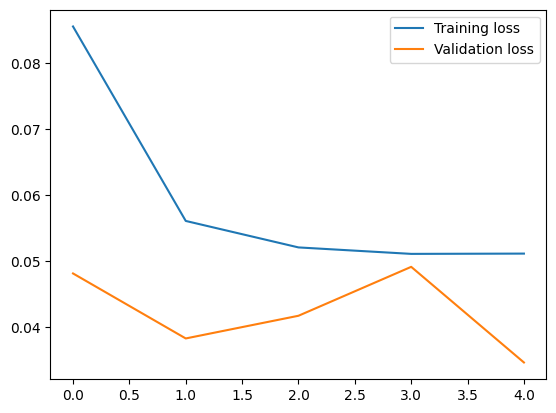

In [96]:
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [97]:
train_dates = df.index
train_dates

DatetimeIndex(['1973-01-01', '1973-01-02', '1973-01-03', '1973-01-04',
               '1973-01-05', '1973-01-06', '1973-01-07', '1973-01-08',
               '1973-01-09', '1973-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='일시', length=18262, freq=None)

In [137]:
n_past = 3650
n_days_for_prediction=3650  #let us predict past 60 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()

115/115 [==============================] - 2s 17ms/step


<ipython-input-139-8ed7a785c4e0>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['일시'] = original.index;


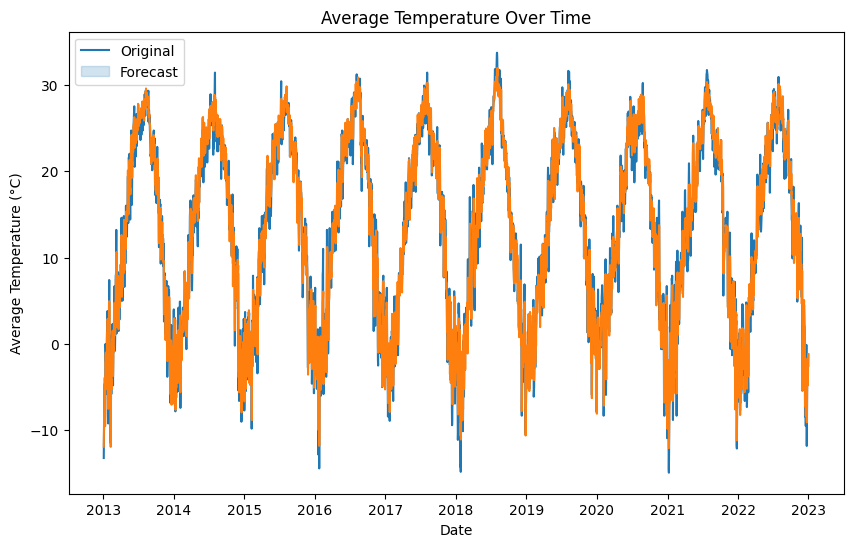

In [139]:
#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'일시':np.array(forecast_dates), '평균기온(°C)':y_pred_future})
df_forecast['일시']=pd.to_datetime(df_forecast['일시'])


original = df[['평균기온(°C)']]
# original['일시']=pd.to_datetime(original['일시'])
# original = original.loc[original['일시'] >= '2020-5-1']

# sns.lineplot(original['일시'], original['평균기온(°C)'])
# sns.lineplot(df_forecast['일시'], df_forecast['평균기온(°C)'])
original['일시'] = original.index;
original = original.loc[original['일시'] >= '2013-01-03']

plt.figure(figsize=(10, 6))
sns.lineplot(x=original['일시'], y=original['평균기온(°C)'])
sns.lineplot(x=df_forecast['일시'], y=df_forecast['평균기온(°C)'])
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature Over Time')
plt.legend(['Original', 'Forecast'])
plt.show()

In [129]:
df_forecast.tail()
original.tail()

,평균기온(°C),일시
일시,,
2022-12-27,-2.6,2022-12-27
2022-12-28,-3.3,2022-12-28
2022-12-29,-2.9,2022-12-29
2022-12-30,-1.8,2022-12-30
2022-12-31,-1.2,2022-12-31


In [140]:
# 정확도 측정 (실제 값과 예측 값의 평균 차이)
from sklearn.metrics import mean_absolute_error

# predictions["diff"].mean()
mean_absolute_error(original["평균기온(°C)"], df_forecast["평균기온(°C)"])

1.4108699594567697